# Test GEModelTools - HANK

This notebook shows how to **solve a simple Heterogenous Agent New Keynessian (HANK) model** using the `GEModelTools` package.

**The steps of the sequence-space solution method are:**

1. Find the stationary equilibrium (steady state for aggregates and distribution).
2. Compute Jacobians of the household block and the full model (to unknowns and shocks)
3. Find the non-linear transition path or the linearized impulse responses to a given shock path.
4. Simulate the linearized model with aggregate risk

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANKModel import HANKModelClass

# Setup

In [2]:
model = HANKModelClass(name='baseline')

In [3]:
model.print_unpack_varlist()

    for ncol in range(ncols):

        # unpack
        A = path.A[ncol,:]
        B = path.B[ncol,:]
        clearing_A = path.clearing_A[ncol,:]
        clearing_N = path.clearing_N[ncol,:]
        clearing_Y = path.clearing_Y[ncol,:]
        d = path.d[ncol,:]
        G = path.G[ncol,:]
        i = path.i[ncol,:]
        N = path.N[ncol,:]
        NKPC_res = path.NKPC_res[ncol,:]
        pi = path.pi[ncol,:]
        adjcost = path.adjcost[ncol,:]
        r = path.r[ncol,:]
        istar = path.istar[ncol,:]
        tau = path.tau[ncol,:]
        w = path.w[ncol,:]
        Y = path.Y[ncol,:]
        Z = path.Z[ncol,:]
        A_hh = path.A_hh[ncol,:]
        C_hh = path.C_hh[ncol,:]
        ELL_hh = path.ELL_hh[ncol,:]
        N_hh = path.N_hh[ncol,:]


# Step 1: Steady state

In [4]:
model.find_ss(do_print=True)

steady state found in 13.0 secs
 beta   =   0.9822
 varphi =   0.7864

Discrepancy in A =   0.00000000
Discrepancy in N =   0.00000000
Discrepancy in Y =   0.00000000


In [5]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

## Policy functions

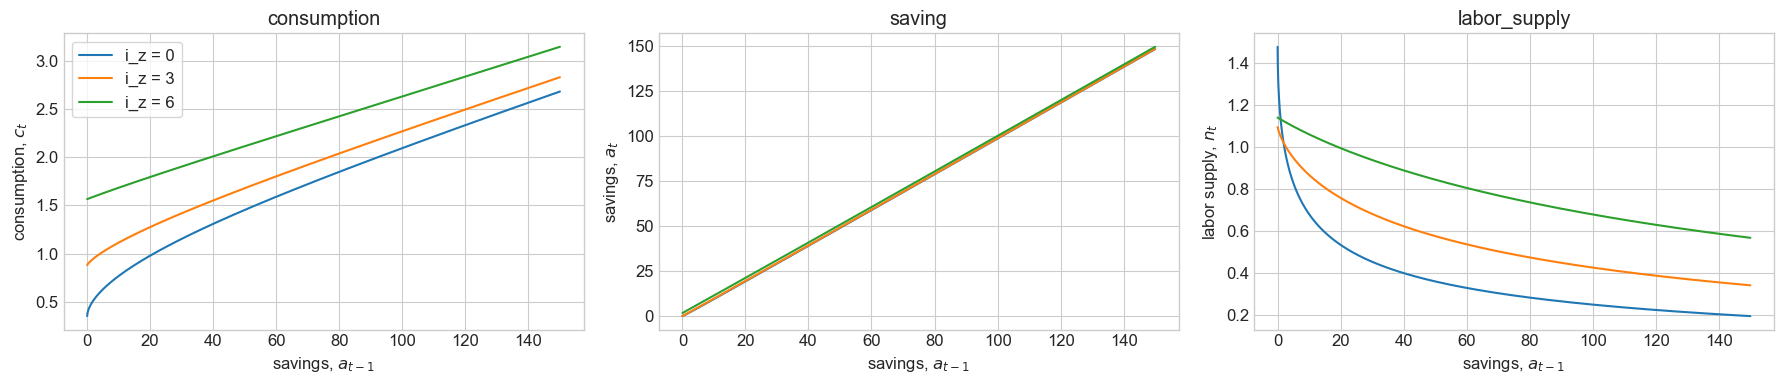

In [6]:
fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 500

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[0,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,3)
ax.set_title(f'labor_supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[0,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')

fig.tight_layout()

## Simulation

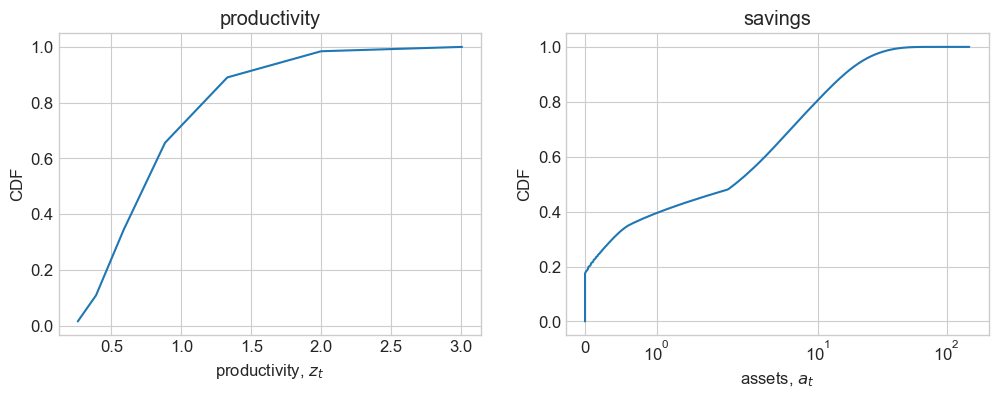

In [7]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D[0],axis=1))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D[0],axis=0)),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')


# Step 2: Compute Jacobians (incl. tests)

**Household transition path:**

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.7 secs
household problem simulated along transition in 1.5 secs



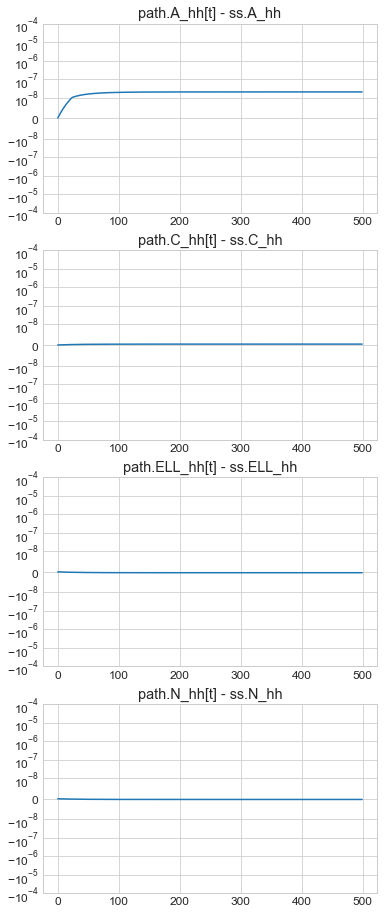

In [8]:
model.test_hh_path()

**Full transition path:**

In [9]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 =  0.0e+00, max abs.  0.0e+00
B              : t0 =  0.0e+00, max abs.  0.0e+00
clearing_A     : t0 = -6.9e-13, max abs.  2.0e-08
clearing_N     : t0 = -4.0e-13, max abs.  3.4e-10
clearing_Y     : t0 =  3.6e-13, max abs.  4.2e-10
d              : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  0.0e+00
N              : t0 =  0.0e+00, max abs.  0.0e+00
pi             : t0 =  0.0e+00, max abs.  0.0e+00
adjcost        : t0 =  0.0e+00, max abs.  0.0e+00
r              : t0 = -1.1e-16, max abs.  1.1e-16
istar          : t0 =  0.0e+00, max abs.  0.0e+00
tau            : t0 = -6.0e-16, max abs.  6.0e-16
w              : t0 =  0.0e+00, max abs.  0.0e+00
Y              : t0 =  0.0e+00, max abs.  0.0e+00
Z              : t0 =  0.0e+00, max abs.  0.0e+00
A_hh           : t0

In [10]:
#model.test_jacs(s_list=[50,100,150])
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for d               in 0.5 secs
curly_Y and curly_D calculated for r               in 0.5 secs
curly_Y and curly_D calculated for tau             in 0.5 secs
curly_Y and curly_D calculated for w               in 0.5 secs
curly_E calculated in 1.7 secs
builiding blocks combined in 0.4 secs
household Jacobian computed in 4.2 secs

full Jacobians:
full Jacobian to unknowns computed in 1.0 secs [in evaluate_path(): 0.5 secs]
full Jacobian to shocks computed in 0.9 secs [in evaluate_path(): 0.5 secs]


# Step 3a: Find non-linear transition path

## Find transition path

In [11]:
par.jump_istar = -0.010/4
model.find_transition_path(do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 1.46e-02
   0.00e+00 in NKPC_res
   2.73e-03 in clearing_N
   1.46e-02 in clearing_A
 it =   1 -> max. abs. error = 1.25e-04
   1.02e-06 in NKPC_res
   6.30e-06 in clearing_N
   1.25e-04 in clearing_A
 it =   2 -> max. abs. error = 5.51e-07
   6.18e-08 in NKPC_res
   1.43e-07 in clearing_N
   5.51e-07 in clearing_A
 it =   3 -> max. abs. error = 1.20e-08
   1.97e-10 in NKPC_res
   2.11e-09 in clearing_N
   1.20e-08 in clearing_A
 it =   4 -> max. abs. error = 1.47e-10
   9.83e-13 in NKPC_res
   2.77e-11 in clearing_N
   1.47e-10 in clearing_A
 it =   5 -> max. abs. error = 3.21e-13
   3.49e-15 in NKPC_res
   6.51e-14 in clearing_N
   3.21e-13 in clearing_A

transition path found in 4.0 secs


## Plot transitions

### shocks ###


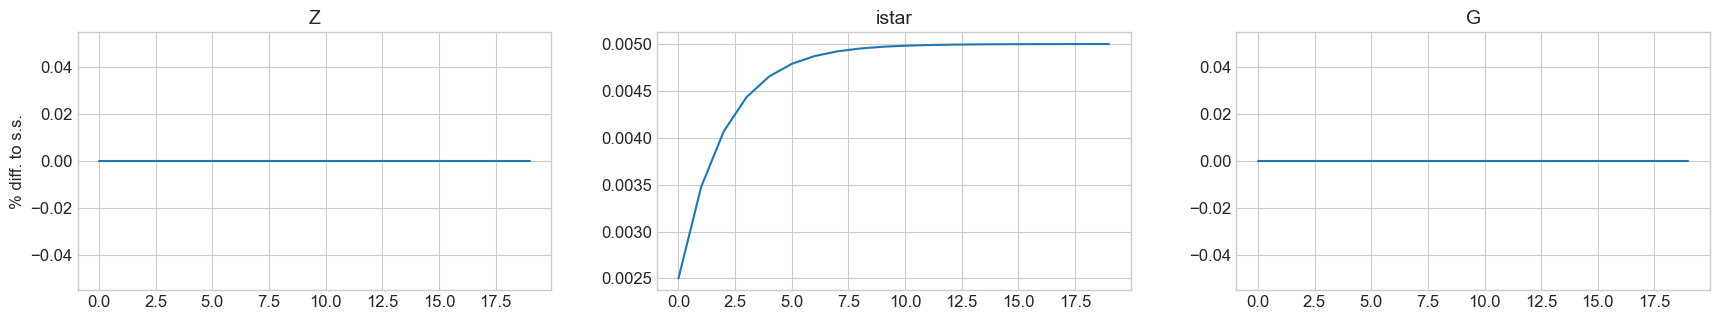


### varnames ###


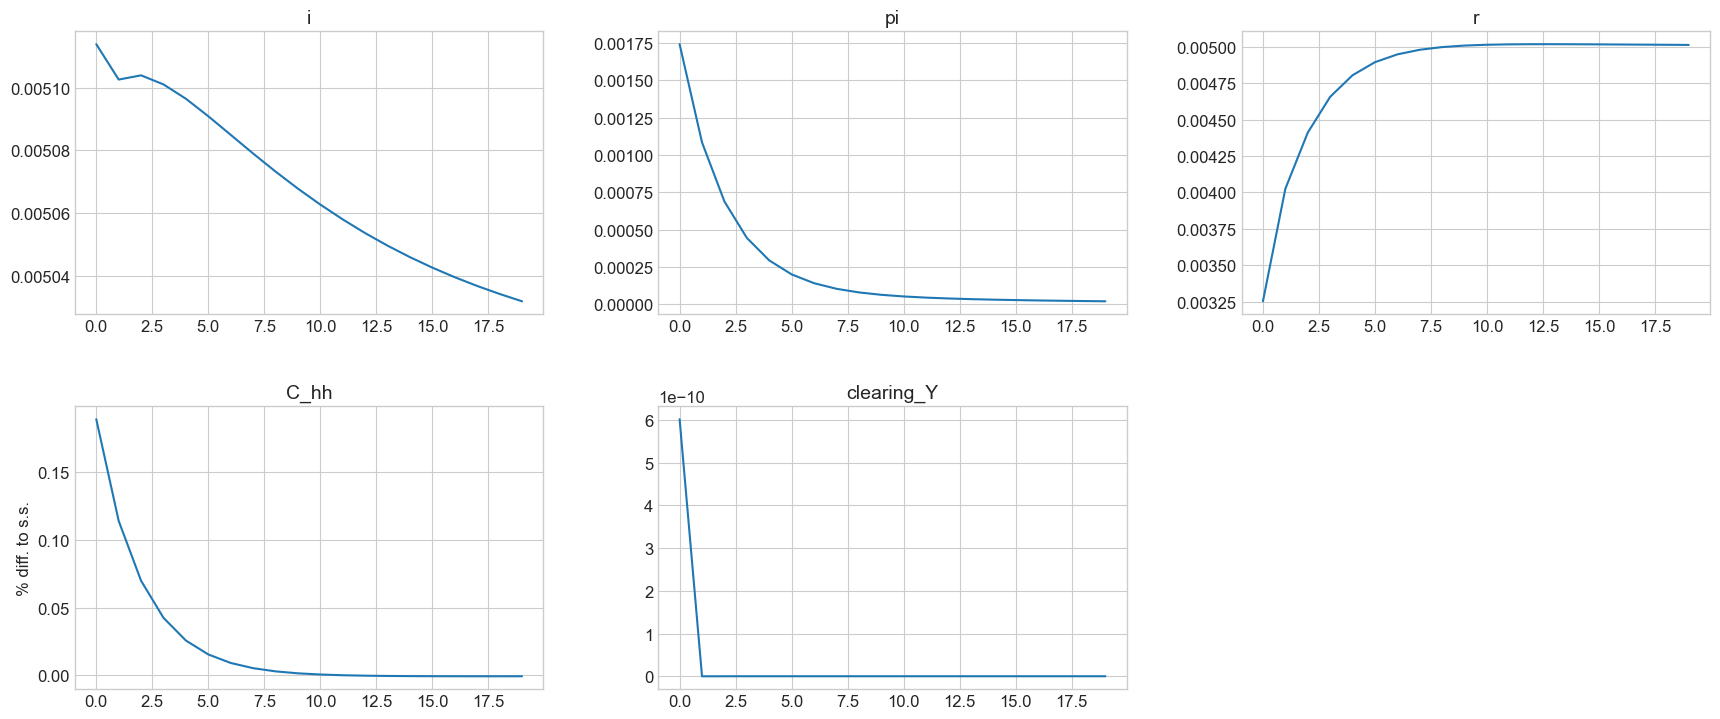


### tagets ###


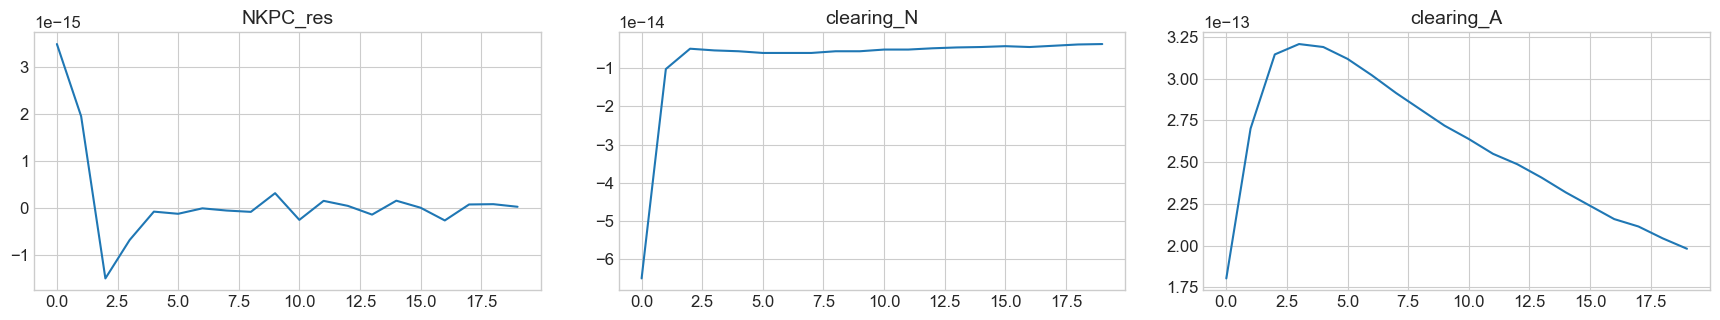

In [12]:
paths = ['i','pi','r','C_hh','clearing_Y']
lvl_value = ['i','pi','r','istar','G','clearing_Y']
model.show_IRFs(paths,lvl_value=lvl_value,T_max=20,ncols=3)

## Find effect of parameter change

In [13]:
model_ = model.copy()
model_.par.phi_y = 1.0
# model_.find_ss()
model_.compute_jacs()
model_.find_transition_path()

### varnames ###


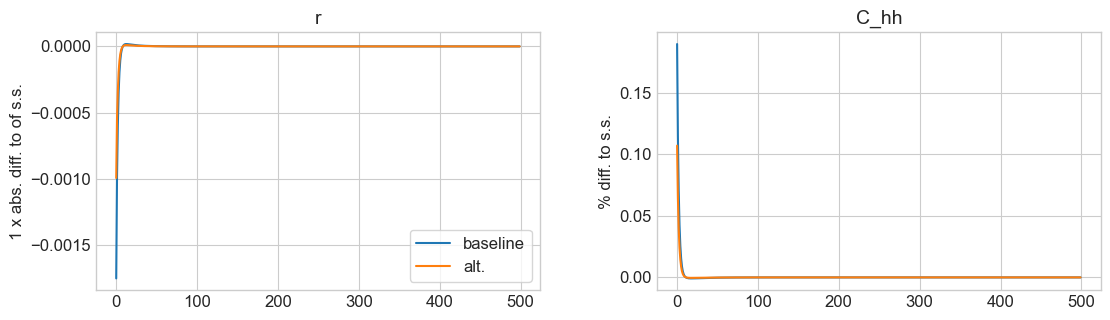

In [14]:
paths = ['r','C_hh']
model.compare_IRFs([model,model_],['baseline','alt.'],paths,lvl_value,do_shocks=False,do_targets=False,ncols=2)

# Step 3b: Find linearized IRFs

In [15]:
model.find_IRFs(do_print=True)

linear transition path found in 0.2 secs [finding solution matrix: 0.2 secs]


### shocks ###


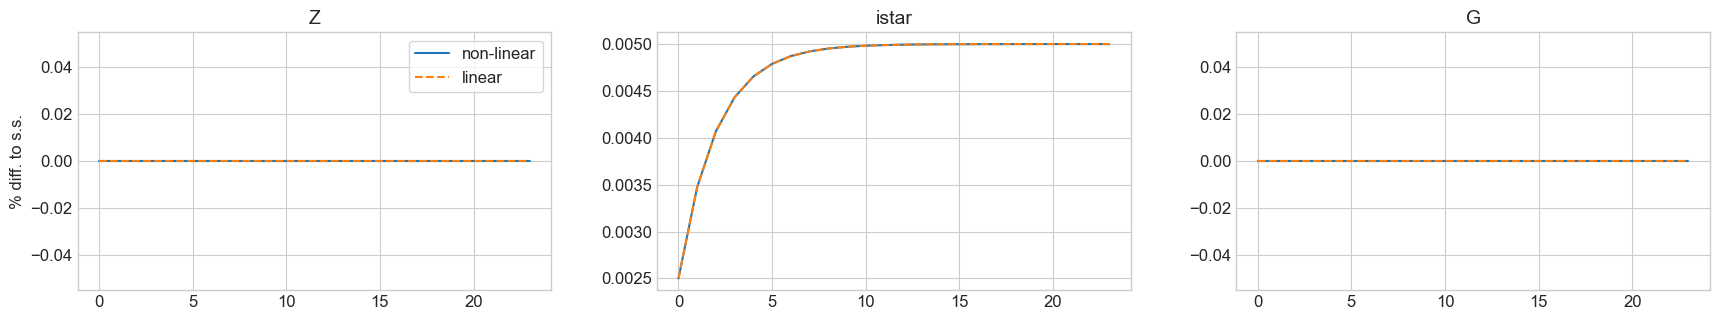


### varnames ###


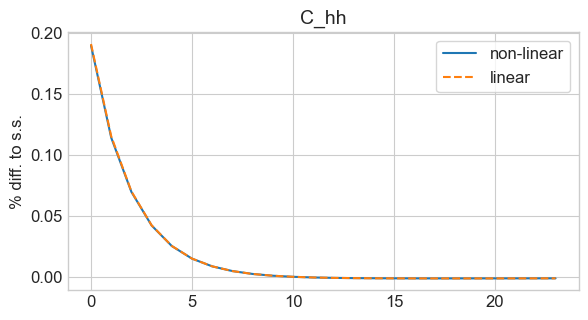


### tagets ###


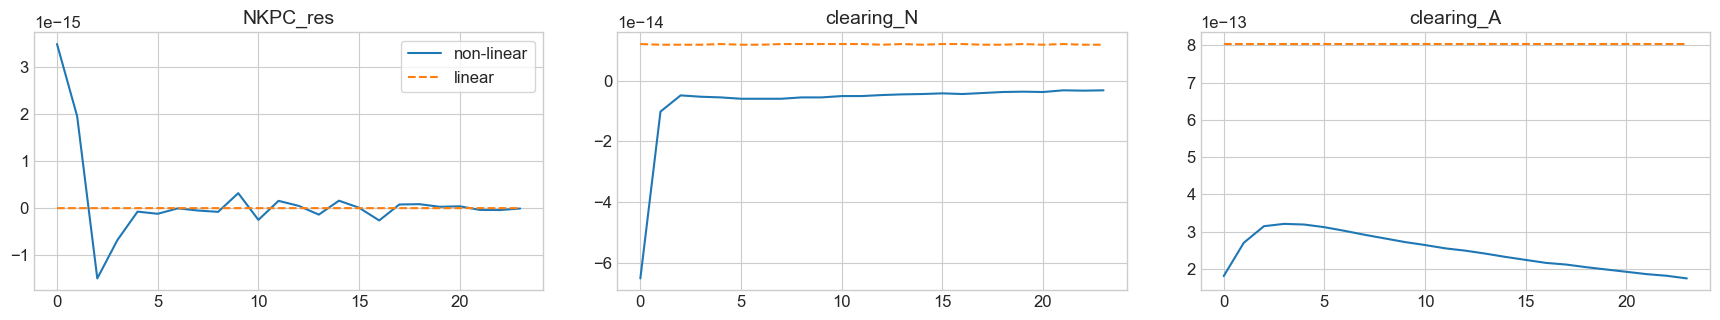

In [16]:
paths = ['C_hh']
model.show_IRFs(paths,lvl_value=lvl_value,T_max=24,ncols=3,do_linear=True)

# Step 4. Simulation

In [17]:
np.random.seed(1917)
model.simulate(do_print=True)

simulation prepared in 16.7 secs [solution matrix: 0.2 secs, households: 16.5 secs]
aggregates simulated in 0.7 secs
household policies simulated in 13.0 secs
distribution simulated in 0.3 secs
aggregates calculated from distribution in 0.0 secs


In [18]:
def model_sim():
    
    fig = plt.figure(figsize=(12,8),dpi=100)

    ax = fig.add_subplot(2,2,1)
    ax.set_title('i')
    ax.plot(ss.i+sim.di,ls='--')
    ax.axhline(ss.i,color='black',zorder=0)

    ax = fig.add_subplot(2,2,2)
    ax.set_title('pi')
    ax.plot(ss.pi+sim.dpi,ls='--',)
    ax.axhline(ss.pi,color='black',zorder=0)
    
    ax = fig.add_subplot(2,2,3)
    ax.set_title('r')
    ax.plot(ss.r+sim.dr,ls='--',)
    ax.axhline(ss.r,color='black',zorder=0)
    
    ax = fig.add_subplot(2,2,4)
    ax.set_title('C_hh')
    ax.plot(ss.C_hh+sim.dC_hh,ls='--',)
    ax.axhline(ss.C_hh,color='black',zorder=0)
    

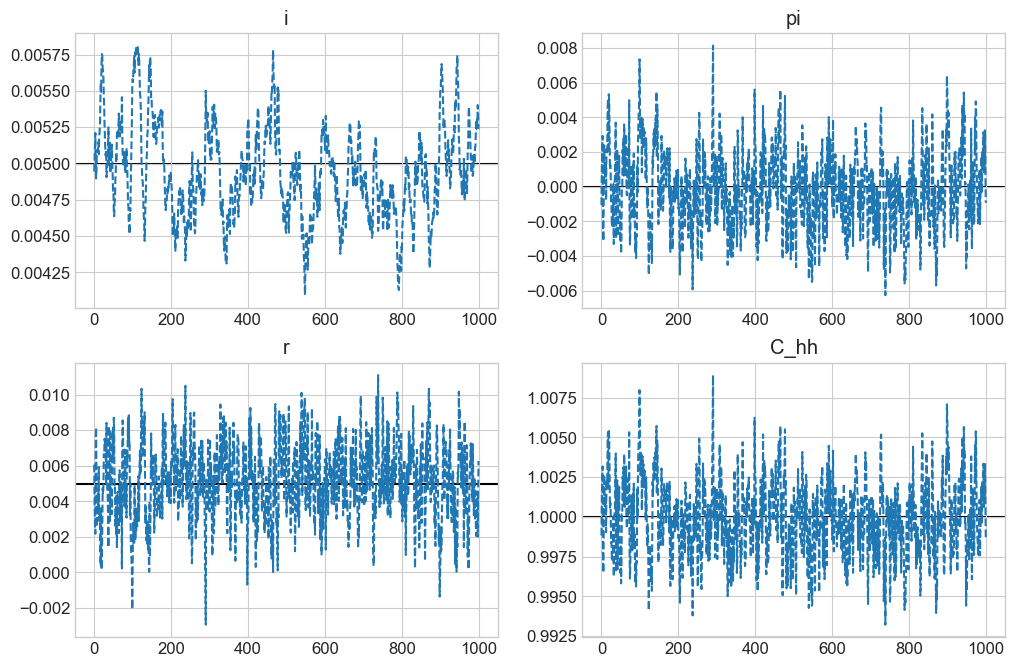

In [19]:
model_sim()